In [3]:
pip install mglearn

     |████████████████████████████████| 542kB 5.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=f8c57bf7db467d52d83cd5b5281637b0c8c7621ecd211c7bc1d06b34f58fadfe
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [4]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


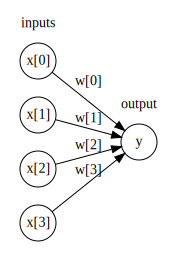

In [5]:
display(mglearn.plots.plot_logistic_regression_graph())

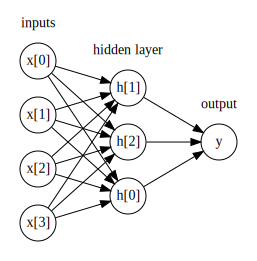

In [6]:
display(mglearn.plots.plot_single_hidden_layer_graph())

In [0]:
# 비선형 함수, Relu(렐루-rectified linear unit, ReLU), tanh(하이퍼 볼릭 탄젠트-
# hyperbolic tangent)

# ReLU 함수는 0이하를 잘라버림.
# tanh 함수는 낮은 입력값에 대해 -1로 수렴, 큰 입력값에 대해 +1로 수렴
# sigmoid 함수는 낮은 입력값에 대해 0에 수렴, 큰 입력값에 대해 1로 수렴

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = np.linspace(-5,5,500)
tanh_x = np.tanh(x)
relu_x = np.maximum(x, 0)
sig_x = 1/(1+np.exp(-x))

step_x = x.copy()
step_x[step_x <= 0] = 0
step_x[step_x >0] = 1

In [0]:
# 음수 표시
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [0]:
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (14,10)

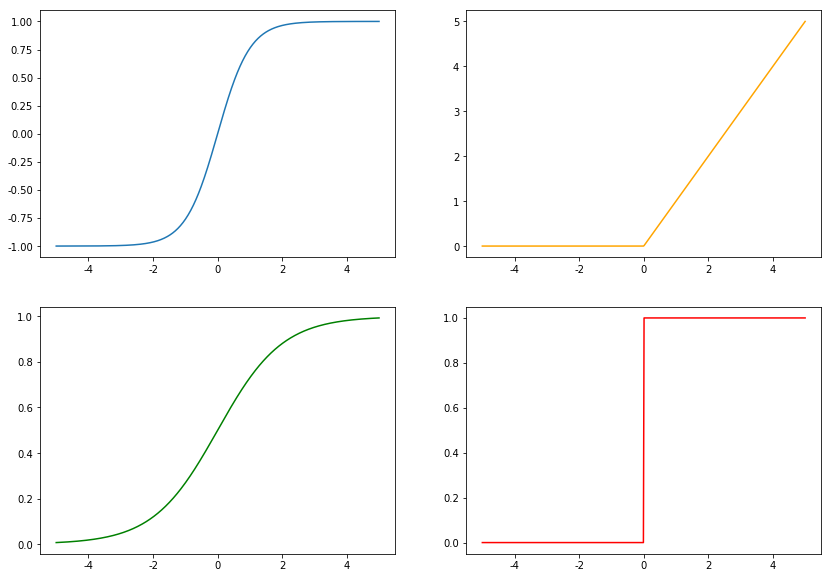

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

ax1.plot(x, tanh_x, label='tanh')
ax2.plot(x, np.maximum(x,0), label='relu', color='orange')
ax3.plot(x, sig_x, label='sigmoid', color='green')
ax4.plot(x, step_x, label='step', color='red')

Text(0, 0.5, 'relu(x), tanh(x)')

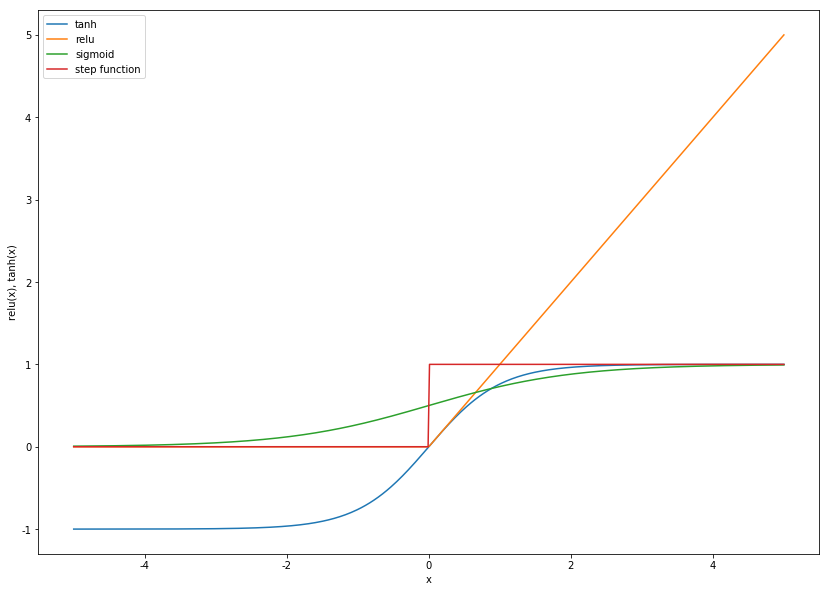

In [16]:
plt.plot(x, tanh_x, label='tanh')
plt.plot(x, relu_x, label='relu')
plt.plot(x, sig_x, label='sigmoid')
plt.plot(x, step_x, label='step function')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

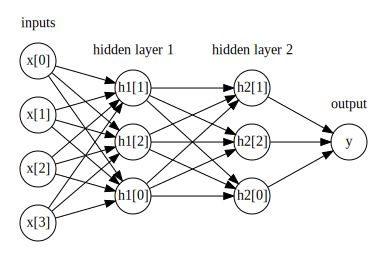

In [17]:
mglearn.plots.plot_two_hidden_layer_graph()

In [0]:
## 보통 분류의 모델의 경우 맨 마지막 출력층에 시그모이드(sigmoid)-이진분류나 소프트맥스(다중분류)에 함수를 적용
## 비선형 -> 선형

In [0]:
# 신경망 모델
# MLP(다층 퍼셉트론) 구현인 MLPClassifier를 적용

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [0]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [24]:
mlp = MLPClassifier(solver = 'lbfgs', random_state=0).fit(X_train, y_train)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Text(0, 0.5, '특성 1')

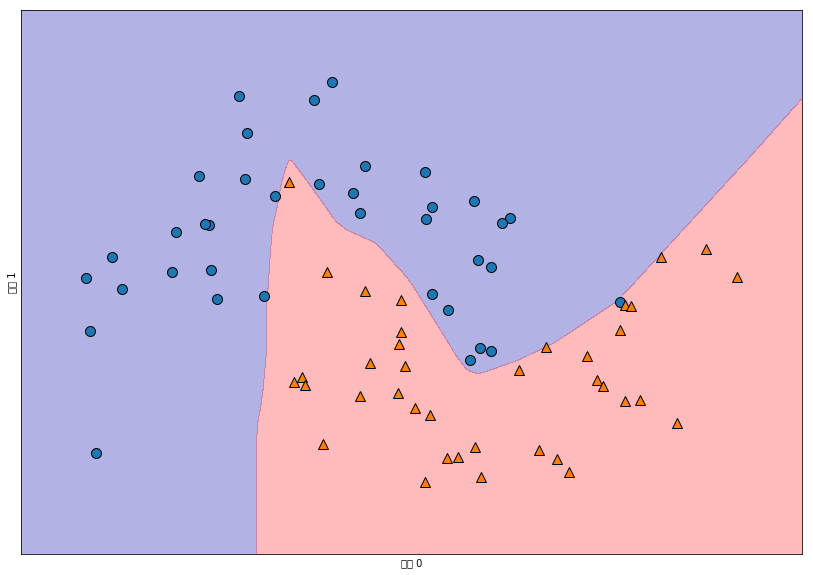

In [25]:
# 은닉 유닛이 100개인 신경망으로 학습시킨 two_moons의 데이터 셋의 결정 경계
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [0]:
# 신경망은 매우 비선형이지만 비교적 매끄러운 결정 경계를 만들었다.
# 은닉유닛이 100개는 작은 데이터에는 좀 큰 크기이다.은닉유닛을 줄여도 좋은 결과을 얻는다.

In [27]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[10], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Text(0, 0.5, '특성 1')

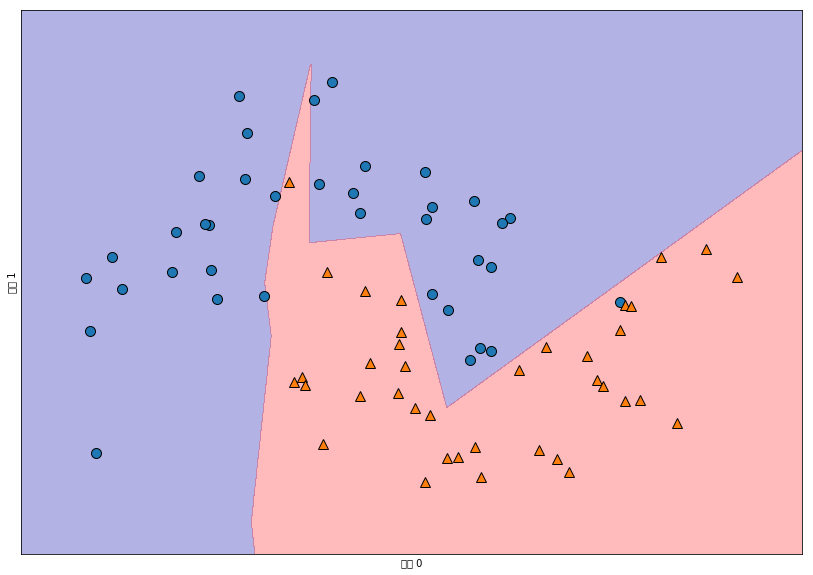

In [28]:
# 은닉 유닛이 10개인 신경망으로 학습시킨 two_moons의 데이터 셋의 결정 경계
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [0]:
# 약간 결정 경계 부분이 조금 더 날카로워짐.
# 은닉층이 하나이므로 결정 경계를 만드는 함수는 직선 10개가 합쳐져서 구성됨.
# 더 매끄러운 결정경계를 원한다면 은닉 유닛 추가, 은닉층 추가 또는 tanh함수 사용

Text(0, 0.5, '특성 1')

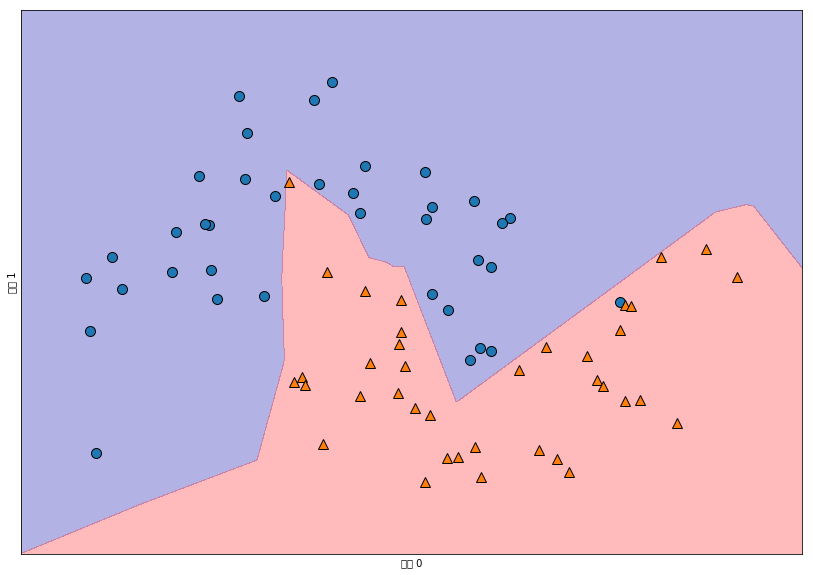

In [30]:
# 10개의 유닛으로 된 두개의 은닉층

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
# 은닉 유닛이 10개인 신경망으로 학습시킨 two_moons의 데이터 셋의 결정 경계
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [0]:
## tanh 함수 적용, 10개 유닛 두개의 은닉층

Text(0, 0.5, '특성 1')

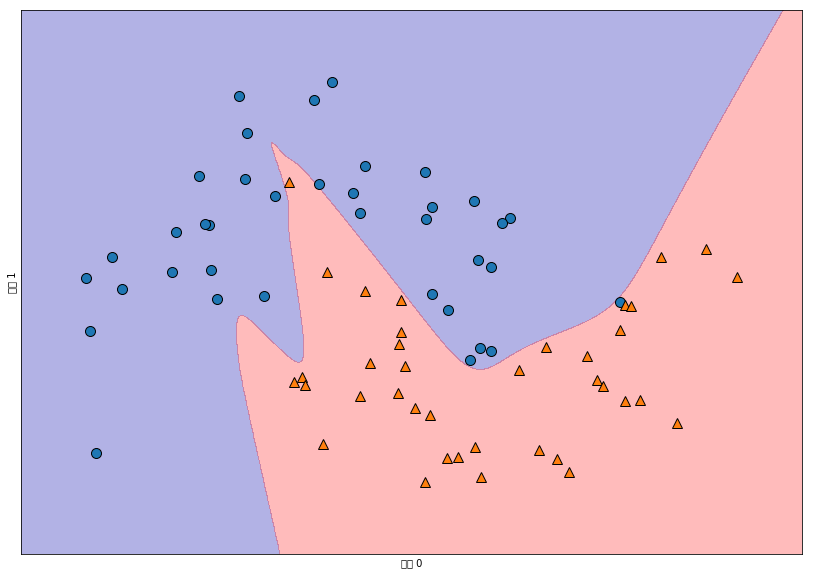

In [32]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
# 은닉 유닛이 10개인 신경망으로 학습시킨 two_moons의 데이터 셋의 결정 경계
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [0]:
### 모델의 복잡도는 낮아지고 좋은 결과를 얻을 수 있다.